In [14]:
# Importamos las librerías pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#Carga del .csv
data=pd.read_csv('Exportaciones.csv')
data

,iso3,year,sector_GMatrix,g_primaryagr,g_otherprim,g_energy,g_procfoods,g_bevtobacco,g_textiles,g_clothing,...,h_finance,h_insurance,h_obsict,h_oconsumer,h_oservices,DomVAshare,GXshare,DXshare,VXsharefwd,VXsharebwd
0,alb,1997,primaryagr,93.3774,0.0143,0.2158,25.0267,0.3817,0.1455,0.9488,...,0.0019,0.0016,0.0981,0.0219,0.0272,0.403022,0.076044,0.077912,0.061838,0.063078
1,alb,1997,otherprim,0.0521,5.7779,0.0979,0.1047,0.0016,0.0062,0.0270,...,0.0004,0.0002,0.0024,0.0022,0.0043,0.431719,0.014879,0.016330,0.012844,0.015691
2,alb,1997,energy,12.8071,3.0441,195.5730,19.9136,0.5700,7.7880,21.7902,...,0.0188,0.0105,0.1329,0.0917,0.2251,0.649150,0.328693,0.542429,0.573427,0.384193
3,alb,1997,procfoods,0.8223,0.0041,0.0706,26.5645,0.0075,0.0079,0.0795,...,0.0003,0.0002,0.0271,0.0020,0.0081,0.195775,0.008920,0.004439,0.006052,0.008129
4,alb,1997,bevtobacco,0.0022,0.0003,0.0036,0.0026,0.6704,0.0003,0.0013,...,0.0000,0.0000,0.0021,0.0002,0.0003,0.214904,0.000820,0.000448,0.000278,0.000710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13198,zwe,2011,finance,15.7700,0.3200,0.2900,5.7900,1.1900,0.6700,1.2400,...,23.2800,0.0300,0.1100,0.0200,0.0100,0.712700,0.012400,0.027000,0.023500,0.019500
13199,zwe,2011,insurance,2.9000,0.0400,0.0300,1.0200,0.2000,0.1200,0.2200,...,0.0100,11.5000,0.0100,0.0000,0.0000,0.670900,0.006500,0.013300,0.009000,0.010100
13200,zwe,2011,obsict,18.5100,0.4300,0.3700,7.9700,1.8700,0.8400,1.5900,...,0.0500,0.0300,68.0500,0.0300,0.0200,0.579500,0.044700,0.079000,0.054700,0.064100
13201,zwe,2011,oconsumer,3.0600,0.0700,0.0800,1.4900,0.3800,0.2000,0.2800,...,0.0100,0.0100,0.0300,10.0300,0.0100,0.456400,0.008400,0.011600,0.008300,0.010700


In [16]:
#Valores nulos por columna
valores_nulos=data.isnull().sum()
valores_nulos

iso3              0
year              0
sector_GMatrix    0
g_primaryagr      0
g_otherprim       0
                 ..
DomVAshare        0
GXshare           0
DXshare           0
VXsharefwd        0
VXsharebwd        0
Length: 63, dtype: int64

NO SE DETECTARON VALORES NULOS.
Se procede a detectar y tratar datos atípicos.

In [17]:
#Ya que no hay faltantes, procedo a detectar y tratar atípicos de las variables numéricas.
#Primero hay que quitar las columnas de datos no numéricos del data set

data2=data.drop(["iso3","sector_GMatrix","sector_HMatrix"],axis=1)
data2

,year,g_primaryagr,g_otherprim,g_energy,g_procfoods,g_bevtobacco,g_textiles,g_clothing,g_leather,g_lumber,...,h_finance,h_insurance,h_obsict,h_oconsumer,h_oservices,DomVAshare,GXshare,DXshare,VXsharefwd,VXsharebwd
0,1997,93.3774,0.0143,0.2158,25.0267,0.3817,0.1455,0.9488,1.6739,0.0428,...,0.0019,0.0016,0.0981,0.0219,0.0272,0.403022,0.076044,0.077912,0.061838,0.063078
1,1997,0.0521,5.7779,0.0979,0.1047,0.0016,0.0062,0.0270,0.2404,2.2509,...,0.0004,0.0002,0.0024,0.0022,0.0043,0.431719,0.014879,0.016330,0.012844,0.015691
2,1997,12.8071,3.0441,195.5730,19.9136,0.5700,7.7880,21.7902,17.1130,5.2173,...,0.0188,0.0105,0.1329,0.0917,0.2251,0.649150,0.328693,0.542429,0.573427,0.384193
3,1997,0.8223,0.0041,0.0706,26.5645,0.0075,0.0079,0.0795,0.8415,0.0105,...,0.0003,0.0002,0.0271,0.0020,0.0081,0.195775,0.008920,0.004439,0.006052,0.008129
4,1997,0.0022,0.0003,0.0036,0.0026,0.6704,0.0003,0.0013,0.0014,0.0007,...,0.0000,0.0000,0.0021,0.0002,0.0003,0.214904,0.000820,0.000448,0.000278,0.000710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13198,2011,15.7700,0.3200,0.2900,5.7900,1.1900,0.6700,1.2400,0.3500,0.6700,...,23.2800,0.0300,0.1100,0.0200,0.0100,0.712700,0.012400,0.027000,0.023500,0.019500
13199,2011,2.9000,0.0400,0.0300,1.0200,0.2000,0.1200,0.2200,0.0600,0.1200,...,0.0100,11.5000,0.0100,0.0000,0.0000,0.670900,0.006500,0.013300,0.009000,0.010100
13200,2011,18.5100,0.4300,0.3700,7.9700,1.8700,0.8400,1.5900,0.4200,0.8300,...,0.0500,0.0300,68.0500,0.0300,0.0200,0.579500,0.044700,0.079000,0.054700,0.064100
13201,2011,3.0600,0.0700,0.0800,1.4900,0.3800,0.2000,0.2800,0.0700,0.1600,...,0.0100,0.0100,0.0300,10.0300,0.0100,0.456400,0.008400,0.011600,0.008300,0.010700


<Figure size 2880x2160 with 0 Axes>

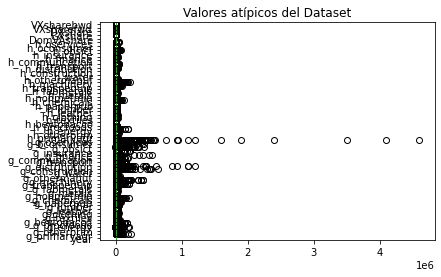

In [18]:
#Diagramas de caja y bigotes de cada columna del dataframe
data3=data2.copy()

fig = plt.figure(figsize=(40,30))
data3.plot(kind='box', vert=False)
plt.title("Valores atípicos del Dataset")
plt.show() #Mostramos el diagrama

No se logra apreciar tan claramente, pero parece ser que hay valores atípicos en todas las variables.

ELIMINAR OUTLIERS DEL DATASET CON DESV EST

In [19]:
#Método aplicando desv est. Encuentro los valores extremos.
y=data3
LS = y.mean() + 3*y.std()
LI = y.mean() - 3*y.std()
print("Limite superior ",LS)
print("Limite inferior ",LI)

Limite superior  year                2018.790559
g_primaryagr       12210.910097
g_otherprim         2434.563619
g_energy           12682.772240
g_procfoods        13808.740351
g_bevtobacco        3781.470012
g_textiles          2616.658248
g_clothing          3242.687839
g_leather           1653.294386
g_lumber            3141.294788
g_paperpub          4368.281025
g_chemicals        12083.113386
g_nonmetmin         1112.776592
g_metals            2703.204820
g_fabmetals         2448.595523
g_transpequip      15462.264706
g_machinery        32999.900276
g_othermanuf        3708.890680
g_water             1615.056164
g_construction     43321.130296
g_distribution     74583.946651
g_transport        13501.317537
g_communcation      9910.712010
g_finance          26229.650480
g_insurance        11398.762016
g_obsict           34963.268314
g_oconsumer        24567.940171
g_oservices       227727.008256
h_primaryagr        2231.957211
h_otherprim         1956.724394
h_energy           1146

In [20]:
# Encontrar Outliers dentro del Dataframe
# Los NaN son valores normales, los numéricos son outliers
outliers=data3[(y>LS)|(y<LI)]
outliers

,year,g_primaryagr,g_otherprim,g_energy,g_procfoods,g_bevtobacco,g_textiles,g_clothing,g_leather,g_lumber,...,h_finance,h_insurance,h_obsict,h_oconsumer,h_oservices,DomVAshare,GXshare,DXshare,VXsharefwd,VXsharebwd
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.328693,0.542429,0.573427,0.384193
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Obtenemos datos sin outliers del Dataframe
#Convertir los outliers en NA's
data4_desvest=data3[(y<=LS)&(y>=LI)]
data4_desvest

,year,g_primaryagr,g_otherprim,g_energy,g_procfoods,g_bevtobacco,g_textiles,g_clothing,g_leather,g_lumber,...,h_finance,h_insurance,h_obsict,h_oconsumer,h_oservices,DomVAshare,GXshare,DXshare,VXsharefwd,VXsharebwd
0,1997,93.3774,0.0143,0.2158,25.0267,0.3817,0.1455,0.9488,1.6739,0.0428,...,0.0019,0.0016,0.0981,0.0219,0.0272,0.403022,0.076044,0.077912,0.061838,0.063078
1,1997,0.0521,5.7779,0.0979,0.1047,0.0016,0.0062,0.0270,0.2404,2.2509,...,0.0004,0.0002,0.0024,0.0022,0.0043,0.431719,0.014879,0.016330,0.012844,0.015691
2,1997,12.8071,3.0441,195.5730,19.9136,0.5700,7.7880,21.7902,17.1130,5.2173,...,0.0188,0.0105,0.1329,0.0917,0.2251,0.649150,NaN,NaN,NaN,NaN
3,1997,0.8223,0.0041,0.0706,26.5645,0.0075,0.0079,0.0795,0.8415,0.0105,...,0.0003,0.0002,0.0271,0.0020,0.0081,0.195775,0.008920,0.004439,0.006052,0.008129
4,1997,0.0022,0.0003,0.0036,0.0026,0.6704,0.0003,0.0013,0.0014,0.0007,...,0.0000,0.0000,0.0021,0.0002,0.0003,0.214904,0.000820,0.000448,0.000278,0.000710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13198,2011,15.7700,0.3200,0.2900,5.7900,1.1900,0.6700,1.2400,0.3500,0.6700,...,23.2800,0.0300,0.1100,0.0200,0.0100,0.712700,0.012400,0.027000,0.023500,0.019500
13199,2011,2.9000,0.0400,0.0300,1.0200,0.2000,0.1200,0.2200,0.0600,0.1200,...,0.0100,11.5000,0.0100,0.0000,0.0000,0.670900,0.006500,0.013300,0.009000,0.010100
13200,2011,18.5100,0.4300,0.3700,7.9700,1.8700,0.8400,1.5900,0.4200,0.8300,...,0.0500,0.0300,68.0500,0.0300,0.0200,0.579500,0.044700,0.079000,0.054700,0.064100
13201,2011,3.0600,0.0700,0.0800,1.4900,0.3800,0.2000,0.2800,0.0700,0.1600,...,0.0100,0.0100,0.0300,10.0300,0.0100,0.456400,0.008400,0.011600,0.008300,0.010700


In [22]:
#Total de outliers en el nuevo dataset: desv est
valores_nulos4=data4_desvest.isnull().sum().sum()
valores_nulos4

5786

SE REPITE EL PROCESO CON CUARTILES PARA COMPARAR CUANTOS OUTLIERS DETECTAN AMBOS MODELOS.

ELIMINAR OUTLIERS CON CUARTILES

In [23]:
#Método aplicando cartiles. Encuentro cuartiles 0.25 y 0.75
y=data3

p25=y.quantile(0.25) #Q1
p75=y.quantile(0.75) #Q3
iqr=p75-p25

LS_iqr=p75 + 1.5*iqr
LI_iqr=p25 - 1.5*iqr
print("Límite superior permitido",LS_iqr)
print("Límite inferior permitido",LI_iqr)

Límite superior permitido year              2016.000000
g_primaryagr        82.523125
g_otherprim         30.740500
g_energy            29.212250
g_procfoods        345.471475
g_bevtobacco        73.798125
g_textiles          37.033750
g_clothing          51.345175
g_leather           18.862350
g_lumber            31.259250
g_paperpub          35.331125
g_chemicals        147.398850
g_nonmetmin         20.483450
g_metals            70.955125
g_fabmetals         32.732000
g_transpequip      123.902350
g_machinery        247.972400
g_othermanuf        58.784650
g_water              5.324925
g_construction     596.368175
g_distribution     436.253725
g_transport        191.565400
g_communcation      32.275950
g_finance           19.127300
g_insurance         20.112125
g_obsict           151.057300
g_oconsumer        110.160625
g_oservices        573.371450
h_primaryagr        20.733600
h_otherprim         14.021875
h_energy            30.347300
h_procfoods         66.041875
h_bevtobacco  

In [24]:
#Encontramos Outliers del Dataframe
outliers_iqr= data3[(y>LS_iqr)|(y<LI_iqr)]
outliers_iqr

,year,g_primaryagr,g_otherprim,g_energy,g_procfoods,g_bevtobacco,g_textiles,g_clothing,g_leather,g_lumber,...,h_finance,h_insurance,h_obsict,h_oconsumer,h_oservices,DomVAshare,GXshare,DXshare,VXsharefwd,VXsharebwd
0,NaN,93.3774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,195.573,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.328693,0.542429,0.573427,0.384193
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.03,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Obtenemos los datos limpios con los outliers como NA's
data5_iqr = data3[(y<=LS_iqr)&(y>=LI_iqr)]
data5_iqr

,year,g_primaryagr,g_otherprim,g_energy,g_procfoods,g_bevtobacco,g_textiles,g_clothing,g_leather,g_lumber,...,h_finance,h_insurance,h_obsict,h_oconsumer,h_oservices,DomVAshare,GXshare,DXshare,VXsharefwd,VXsharebwd
0,1997,NaN,0.0143,0.2158,25.0267,0.3817,0.1455,0.9488,1.6739,0.0428,...,0.0019,0.0016,0.0981,0.0219,0.0272,0.403022,0.076044,0.077912,0.061838,0.063078
1,1997,0.0521,5.7779,0.0979,0.1047,0.0016,0.0062,0.0270,0.2404,2.2509,...,0.0004,0.0002,0.0024,0.0022,0.0043,0.431719,0.014879,0.016330,0.012844,0.015691
2,1997,12.8071,3.0441,NaN,19.9136,0.5700,7.7880,21.7902,17.1130,5.2173,...,0.0188,0.0105,0.1329,0.0917,0.2251,0.649150,NaN,NaN,NaN,NaN
3,1997,0.8223,0.0041,0.0706,26.5645,0.0075,0.0079,0.0795,0.8415,0.0105,...,0.0003,0.0002,0.0271,0.0020,0.0081,0.195775,0.008920,0.004439,0.006052,0.008129
4,1997,0.0022,0.0003,0.0036,0.0026,0.6704,0.0003,0.0013,0.0014,0.0007,...,0.0000,0.0000,0.0021,0.0002,0.0003,0.214904,0.000820,0.000448,0.000278,0.000710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13198,2011,15.7700,0.3200,0.2900,5.7900,1.1900,0.6700,1.2400,0.3500,0.6700,...,NaN,0.0300,0.1100,0.0200,0.0100,0.712700,0.012400,0.027000,0.023500,0.019500
13199,2011,2.9000,0.0400,0.0300,1.0200,0.2000,0.1200,0.2200,0.0600,0.1200,...,0.0100,NaN,0.0100,0.0000,0.0000,0.670900,0.006500,0.013300,0.009000,0.010100
13200,2011,18.5100,0.4300,0.3700,7.9700,1.8700,0.8400,1.5900,0.4200,0.8300,...,0.0500,0.0300,NaN,0.0300,0.0200,0.579500,0.044700,0.079000,0.054700,0.064100
13201,2011,3.0600,0.0700,0.0800,1.4900,0.3800,0.2000,0.2800,0.0700,0.1600,...,0.0100,0.0100,0.0300,NaN,0.0100,0.456400,0.008400,0.011600,0.008300,0.010700


In [28]:
#Total de outliers en el nuevo dataset: desv est
valores_nulos5=data5_iqr.isnull().sum().sum()
valores_nulos5

125661

In [29]:
#Reemplazamos los valores atípicos (ahora NA's) del dataframe con "mean"
#Realizamos una copia del dataframe
data6_iqr=data5_iqr.copy()
data6_iqr=data6_iqr.fillna(round(data5_iqr.mean(),1))
data6_iqr

,year,g_primaryagr,g_otherprim,g_energy,g_procfoods,g_bevtobacco,g_textiles,g_clothing,g_leather,g_lumber,...,h_finance,h_insurance,h_obsict,h_oconsumer,h_oservices,DomVAshare,GXshare,DXshare,VXsharefwd,VXsharebwd
0,1997,10.5000,0.0143,0.2158,25.0267,0.3817,0.1455,0.9488,1.6739,0.0428,...,0.0019,0.0016,0.0981,0.0219,0.0272,0.403022,0.076044,0.077912,0.061838,0.063078
1,1997,0.0521,5.7779,0.0979,0.1047,0.0016,0.0062,0.0270,0.2404,2.2509,...,0.0004,0.0002,0.0024,0.0022,0.0043,0.431719,0.014879,0.016330,0.012844,0.015691
2,1997,12.8071,3.0441,3.0000,19.9136,0.5700,7.7880,21.7902,17.1130,5.2173,...,0.0188,0.0105,0.1329,0.0917,0.2251,0.649150,0.000000,0.000000,0.000000,0.000000
3,1997,0.8223,0.0041,0.0706,26.5645,0.0075,0.0079,0.0795,0.8415,0.0105,...,0.0003,0.0002,0.0271,0.0020,0.0081,0.195775,0.008920,0.004439,0.006052,0.008129
4,1997,0.0022,0.0003,0.0036,0.0026,0.6704,0.0003,0.0013,0.0014,0.0007,...,0.0000,0.0000,0.0021,0.0002,0.0003,0.214904,0.000820,0.000448,0.000278,0.000710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13198,2011,15.7700,0.3200,0.2900,5.7900,1.1900,0.6700,1.2400,0.3500,0.6700,...,0.3000,0.0300,0.1100,0.0200,0.0100,0.712700,0.012400,0.027000,0.023500,0.019500
13199,2011,2.9000,0.0400,0.0300,1.0200,0.2000,0.1200,0.2200,0.0600,0.1200,...,0.0100,0.4000,0.0100,0.0000,0.0000,0.670900,0.006500,0.013300,0.009000,0.010100
13200,2011,18.5100,0.4300,0.3700,7.9700,1.8700,0.8400,1.5900,0.4200,0.8300,...,0.0500,0.0300,4.4000,0.0300,0.0200,0.579500,0.044700,0.079000,0.054700,0.064100
13201,2011,3.0600,0.0700,0.0800,1.4900,0.3800,0.2000,0.2800,0.0700,0.1600,...,0.0100,0.0100,0.0300,1.2000,0.0100,0.456400,0.008400,0.011600,0.008300,0.010700


In [30]:
#Unimos la columna que habíamos eliminado

iso3=data["iso3"]
sector_GMatrix=data["sector_GMatrix"]
sector_HMatrix=data["sector_HMatrix"]

Datos_limpios = pd.concat([iso3,sector_GMatrix,sector_HMatrix,data6_iqr], axis=1)
Datos_limpios

,iso3,sector_GMatrix,sector_HMatrix,year,g_primaryagr,g_otherprim,g_energy,g_procfoods,g_bevtobacco,g_textiles,...,h_finance,h_insurance,h_obsict,h_oconsumer,h_oservices,DomVAshare,GXshare,DXshare,VXsharefwd,VXsharebwd
0,alb,primaryagr,primaryagr,1997,10.5000,0.0143,0.2158,25.0267,0.3817,0.1455,...,0.0019,0.0016,0.0981,0.0219,0.0272,0.403022,0.076044,0.077912,0.061838,0.063078
1,alb,otherprim,otherprim,1997,0.0521,5.7779,0.0979,0.1047,0.0016,0.0062,...,0.0004,0.0002,0.0024,0.0022,0.0043,0.431719,0.014879,0.016330,0.012844,0.015691
2,alb,energy,energy,1997,12.8071,3.0441,3.0000,19.9136,0.5700,7.7880,...,0.0188,0.0105,0.1329,0.0917,0.2251,0.649150,0.000000,0.000000,0.000000,0.000000
3,alb,procfoods,procfoods,1997,0.8223,0.0041,0.0706,26.5645,0.0075,0.0079,...,0.0003,0.0002,0.0271,0.0020,0.0081,0.195775,0.008920,0.004439,0.006052,0.008129
4,alb,bevtobacco,bevtobacco,1997,0.0022,0.0003,0.0036,0.0026,0.6704,0.0003,...,0.0000,0.0000,0.0021,0.0002,0.0003,0.214904,0.000820,0.000448,0.000278,0.000710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13198,zwe,finance,finance,2011,15.7700,0.3200,0.2900,5.7900,1.1900,0.6700,...,0.3000,0.0300,0.1100,0.0200,0.0100,0.712700,0.012400,0.027000,0.023500,0.019500
13199,zwe,insurance,insurance,2011,2.9000,0.0400,0.0300,1.0200,0.2000,0.1200,...,0.0100,0.4000,0.0100,0.0000,0.0000,0.670900,0.006500,0.013300,0.009000,0.010100
13200,zwe,obsict,obsict,2011,18.5100,0.4300,0.3700,7.9700,1.8700,0.8400,...,0.0500,0.0300,4.4000,0.0300,0.0200,0.579500,0.044700,0.079000,0.054700,0.064100
13201,zwe,oconsumer,oconsumer,2011,3.0600,0.0700,0.0800,1.4900,0.3800,0.2000,...,0.0100,0.0100,0.0300,1.2000,0.0100,0.456400,0.008400,0.011600,0.008300,0.010700


In [32]:
#Corroboramos valores nulos del dataframe LIMPIO

valores_nulos_DL=Datos_limpios.isnull().sum().sum()
valores_nulos_DL

0